In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/kaggle/input/geophone-sensor-dataset/geophone-sensor-data.csv")

In [7]:
df["activity"].unique()

array(['walking', 'running', 'waiting'], dtype=object)

In [8]:
df.isnull().sum()

timestamp        0
mean             0
top_3_mean       0
min              0
max              0
std_dev          0
median           0
q1               0
q3               0
skewness         0
dominant_freq    0
energy           0
activity         0
name             0
dtype: int64

In [11]:
label_encoder=LabelEncoder()
df["activity"]=label_encoder.fit_transform(df["activity"])
df["name"]=label_encoder.fit_transform(df["name"])

In [12]:
df

,timestamp,mean,top_3_mean,min,max,std_dev,median,q1,q3,skewness,dominant_freq,energy,activity,name
0,01:51:43,2046.726000,2057.666667,2035,2060,3.452186,2047.0,2043.0,2049.0,-0.152574,601.0,1.988682e+09,2,4
1,01:51:46,2046.619333,2053.000000,2040,2053,3.580469,2047.0,2044.0,2050.0,-0.150615,300.0,1.988028e+09,2,4
2,01:51:50,2046.598000,2056.000000,2030,2059,3.592826,2047.0,2044.0,2049.0,-0.370125,300.0,1.987897e+09,2,4
3,01:51:53,2046.560000,2054.000000,2039,2055,3.414830,2047.0,2044.0,2049.0,-0.321296,300.0,1.987662e+09,2,4
4,01:51:56,2046.656667,2055.000000,2034,2057,3.356802,2048.0,2044.0,2049.0,-0.379134,300.0,1.988255e+09,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,21:17:01,2037.587333,2040.000000,2034,2040,1.564089,2038.0,2037.0,2039.0,-0.883816,600.0,1.932680e+09,1,1
1796,21:17:04,2037.606000,2041.333333,2033,2042,2.160578,2038.0,2036.0,2040.0,-0.199801,300.0,1.932797e+09,1,1
1797,21:17:07,2037.984000,2041.000000,2034,2041,1.686736,2038.0,2036.0,2039.0,-0.339960,300.0,1.935105e+09,1,1
1798,21:17:10,2037.482000,2041.000000,2033,2041,2.123286,2037.0,2036.0,2040.0,-0.176030,300.0,1.932039e+09,1,1


In [14]:
df.dtypes

timestamp         object
mean             float64
top_3_mean       float64
min                int64
max                int64
std_dev          float64
median           float64
q1               float64
q3               float64
skewness         float64
dominant_freq    float64
energy           float64
activity           int64
name               int64
dtype: object

In [19]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df["hour"]=df['timestamp'].dt.hour
df["minu"]=df['timestamp'].dt.minute
df["sec"]=df['timestamp'].dt.second
df["day"]=df['timestamp'].dt.day
df["month"]=df['timestamp'].dt.month

In [21]:
df=df.drop(columns=["timestamp"])

In [22]:
df

,mean,top_3_mean,min,max,std_dev,median,q1,q3,skewness,dominant_freq,energy,activity,name,hour,minu,sec,day,month
0,2046.726000,2057.666667,2035,2060,3.452186,2047.0,2043.0,2049.0,-0.152574,601.0,1.988682e+09,2,4,1,51,43,27,12
1,2046.619333,2053.000000,2040,2053,3.580469,2047.0,2044.0,2050.0,-0.150615,300.0,1.988028e+09,2,4,1,51,46,27,12
2,2046.598000,2056.000000,2030,2059,3.592826,2047.0,2044.0,2049.0,-0.370125,300.0,1.987897e+09,2,4,1,51,50,27,12
3,2046.560000,2054.000000,2039,2055,3.414830,2047.0,2044.0,2049.0,-0.321296,300.0,1.987662e+09,2,4,1,51,53,27,12
4,2046.656667,2055.000000,2034,2057,3.356802,2048.0,2044.0,2049.0,-0.379134,300.0,1.988255e+09,2,4,1,51,56,27,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2037.587333,2040.000000,2034,2040,1.564089,2038.0,2037.0,2039.0,-0.883816,600.0,1.932680e+09,1,1,21,17,1,27,12
1796,2037.606000,2041.333333,2033,2042,2.160578,2038.0,2036.0,2040.0,-0.199801,300.0,1.932797e+09,1,1,21,17,4,27,12
1797,2037.984000,2041.000000,2034,2041,1.686736,2038.0,2036.0,2039.0,-0.339960,300.0,1.935105e+09,1,1,21,17,7,27,12
1798,2037.482000,2041.000000,2033,2041,2.123286,2037.0,2036.0,2040.0,-0.176030,300.0,1.932039e+09,1,1,21,17,10,27,12


<Axes: >

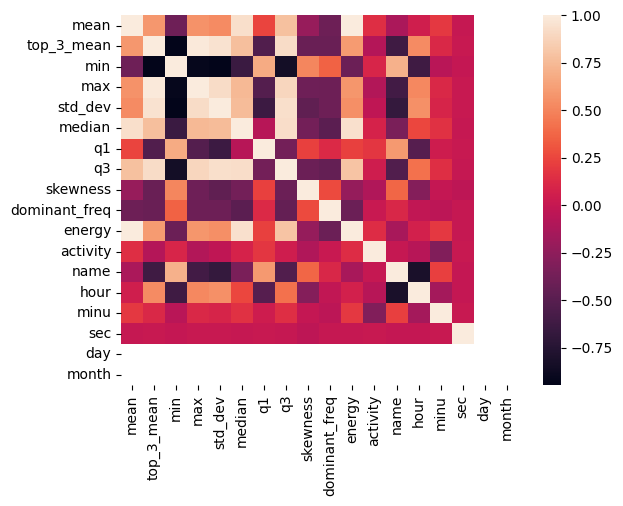

In [25]:
sns.heatmap(df.corr())

In [29]:
# sns.clustermap(df.corr())

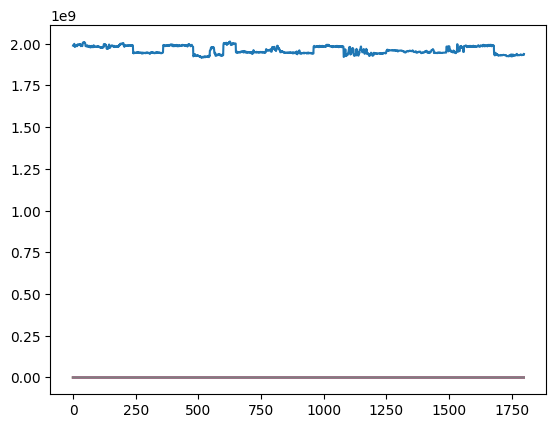

In [31]:
plt.plot(df)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


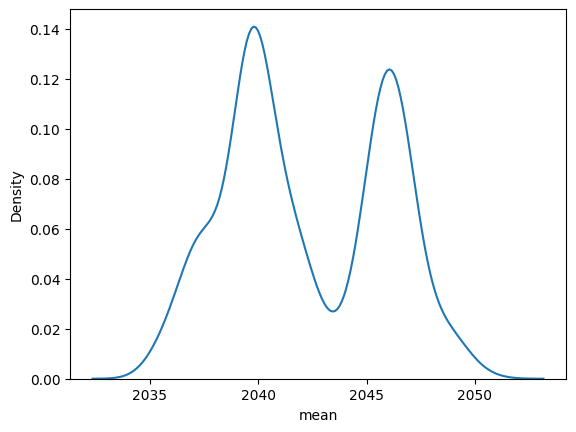

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


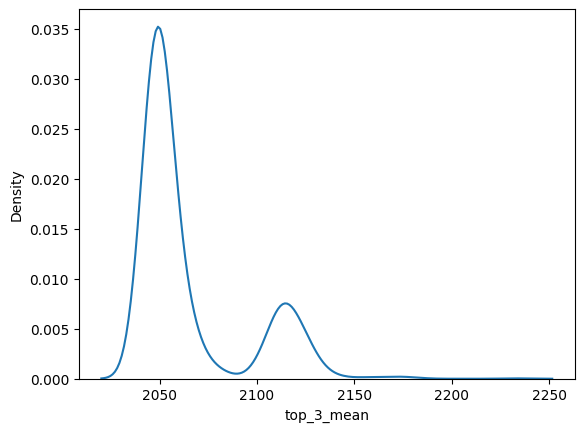

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


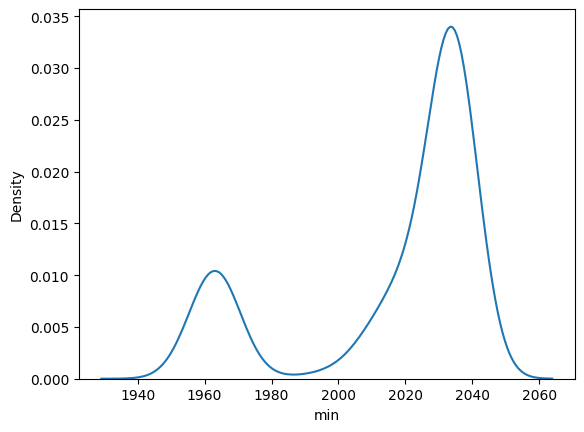

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


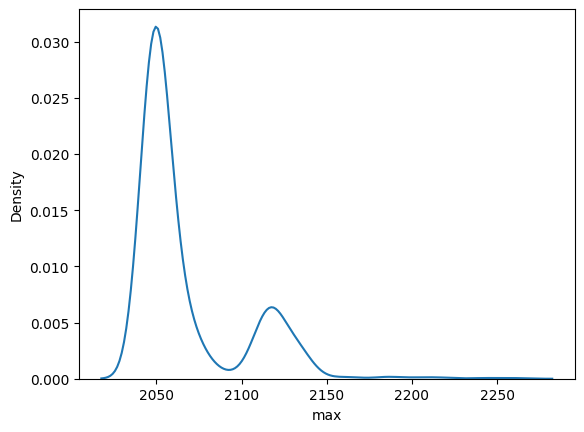

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


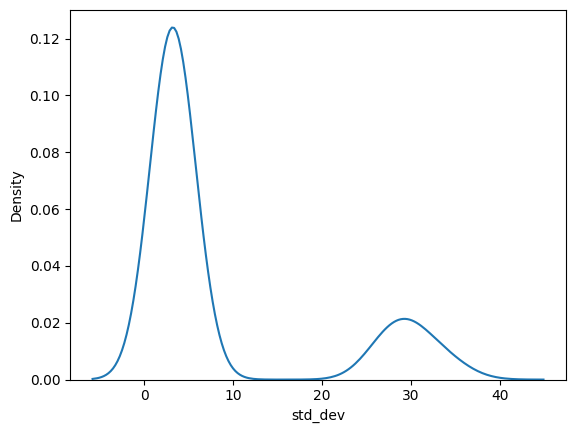

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


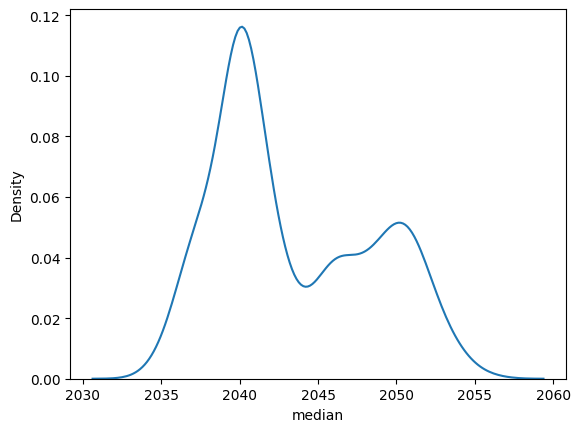

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


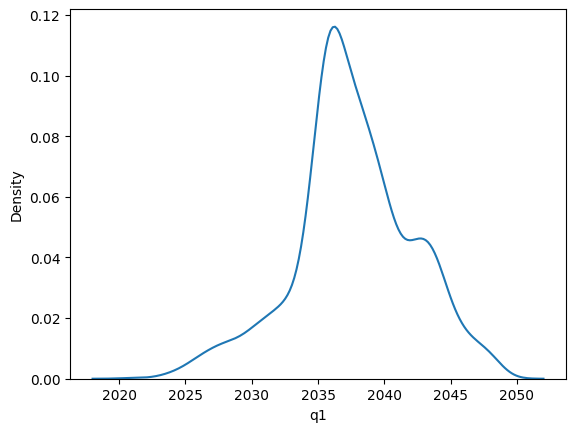

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


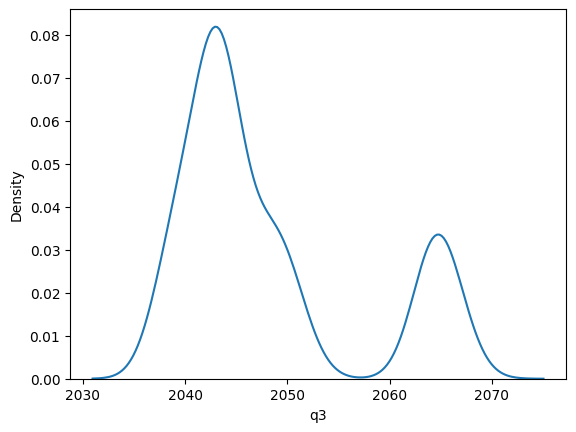

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


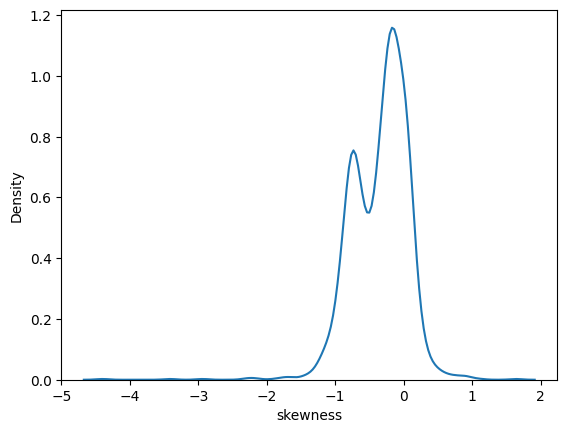

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


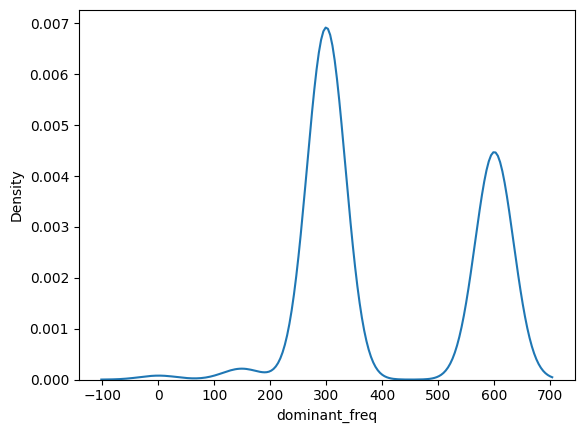

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


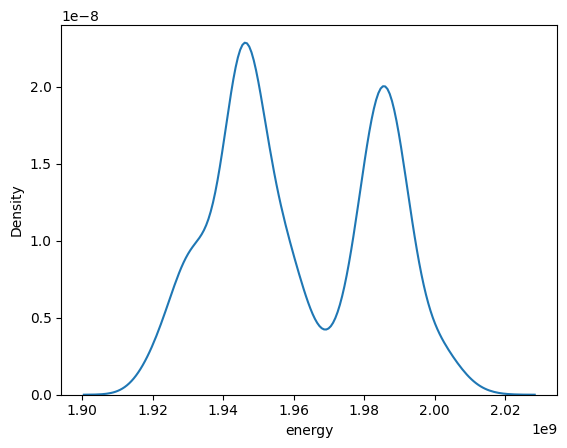

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


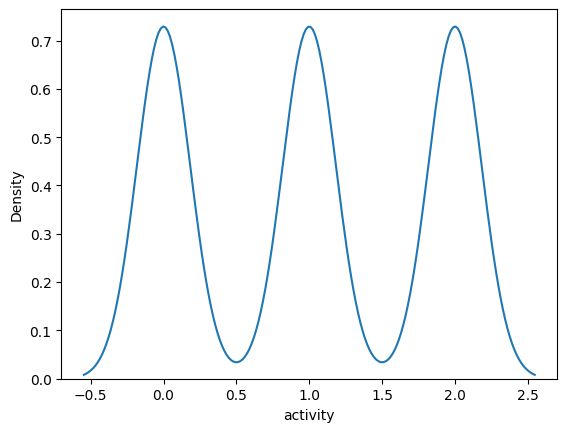

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


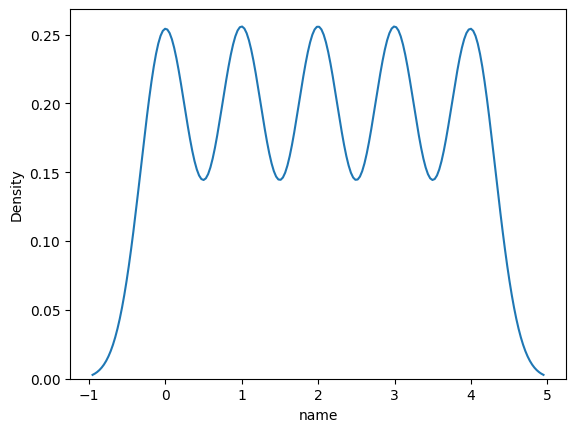

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


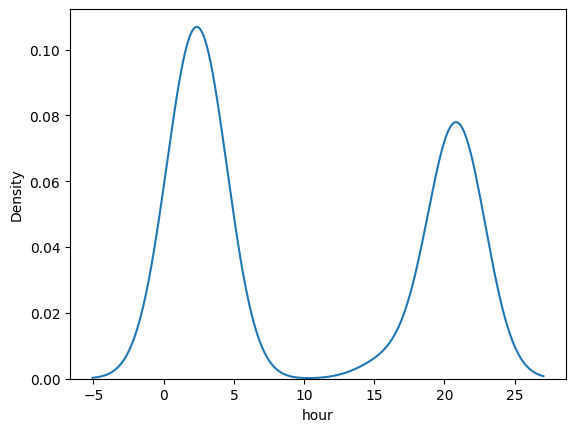

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


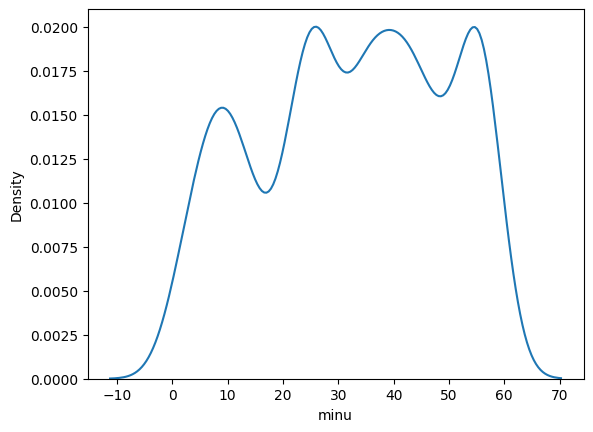

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


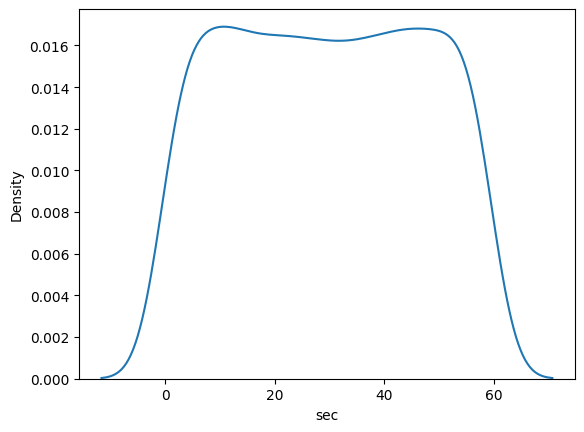

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-35-a0fb80f7d22f>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col])


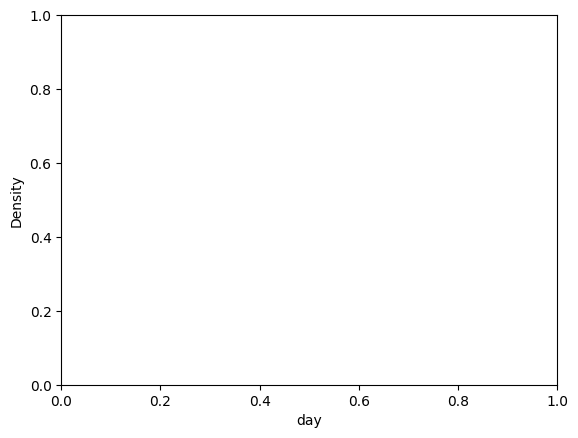

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-35-a0fb80f7d22f>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col])


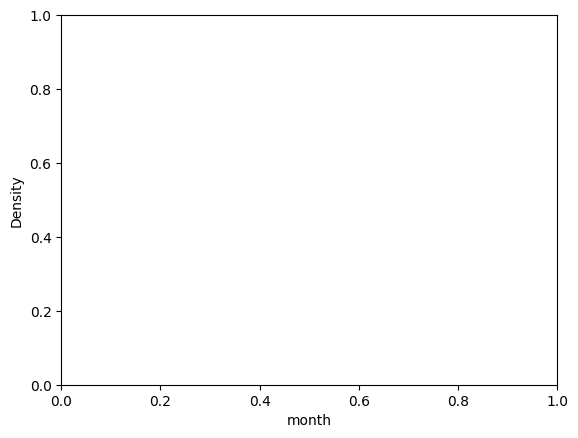

In [35]:
for col in df.columns:
    sns.kdeplot(df[col]) 
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


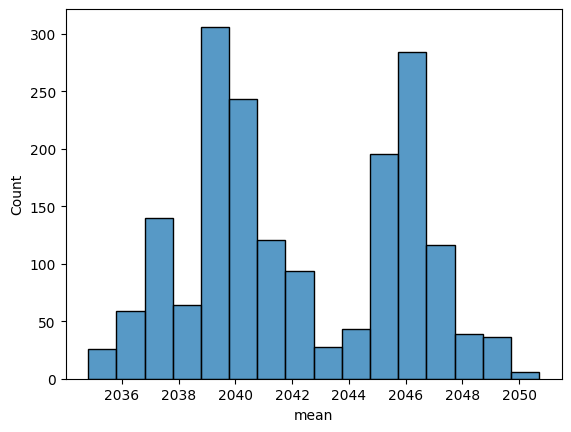

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


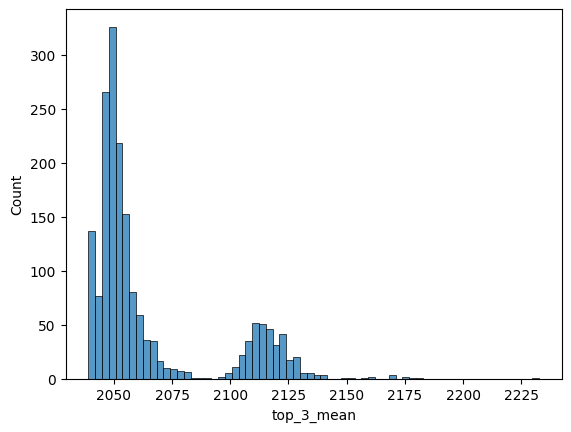

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


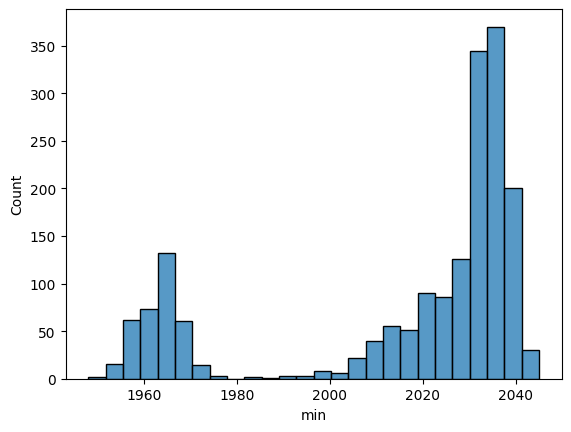

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


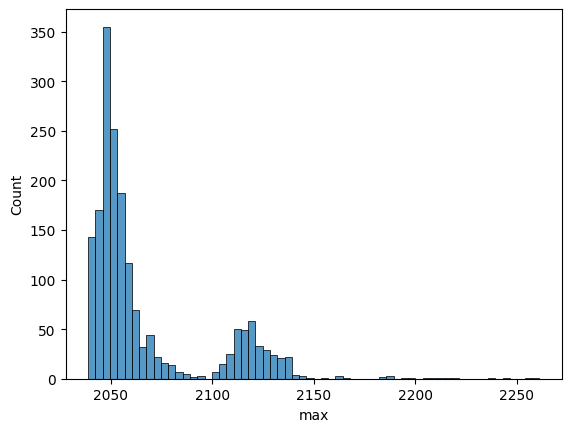

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


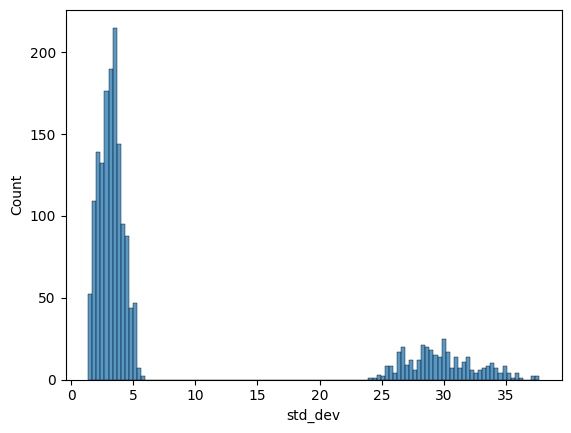

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


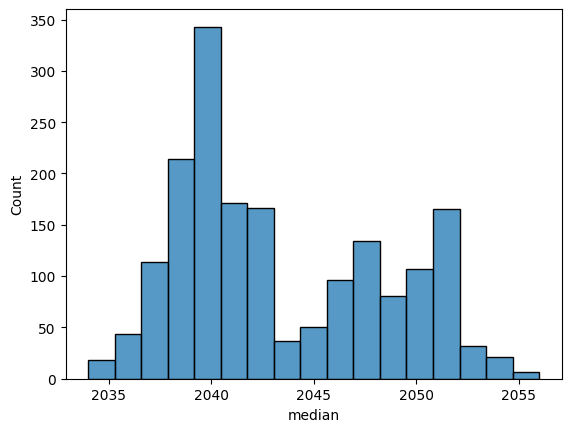

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


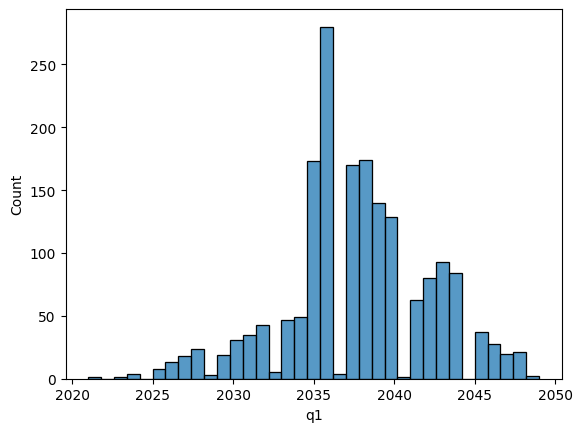

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


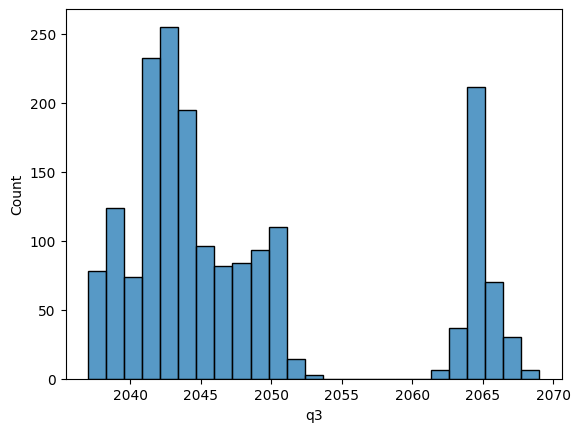

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


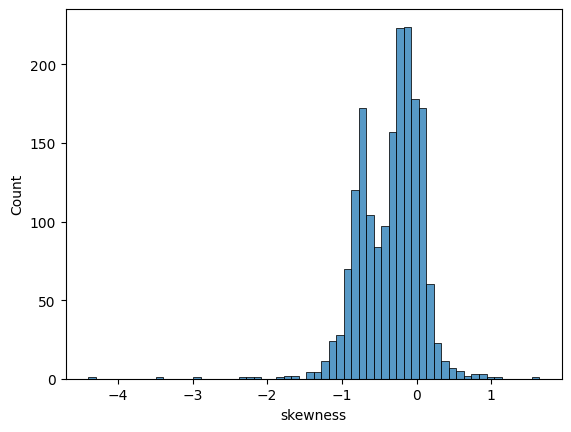

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


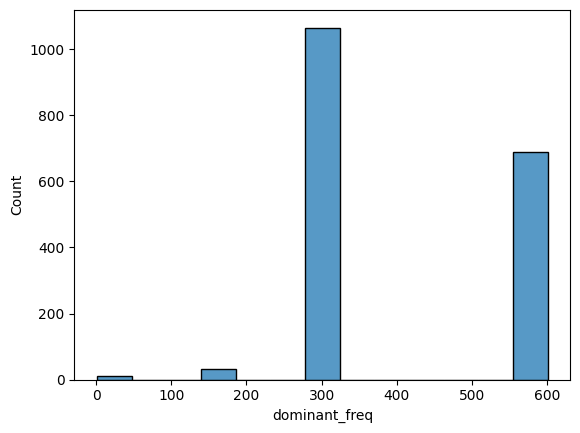

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


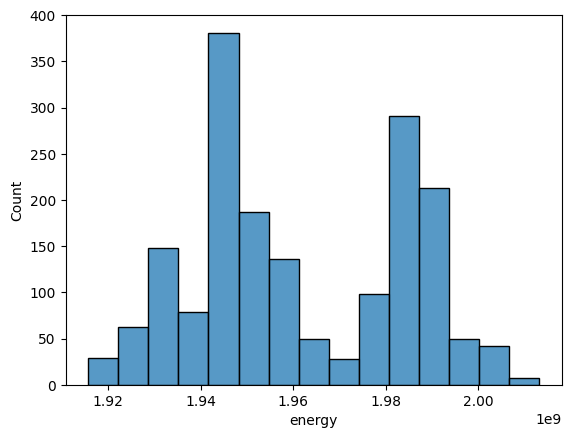

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


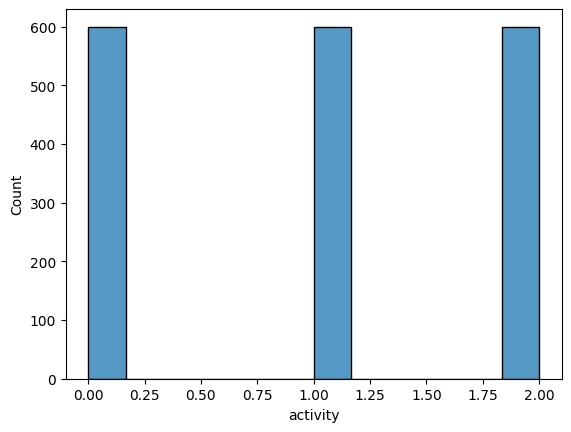

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


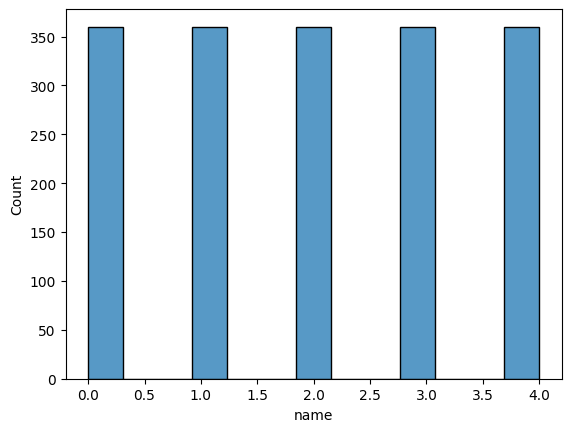

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


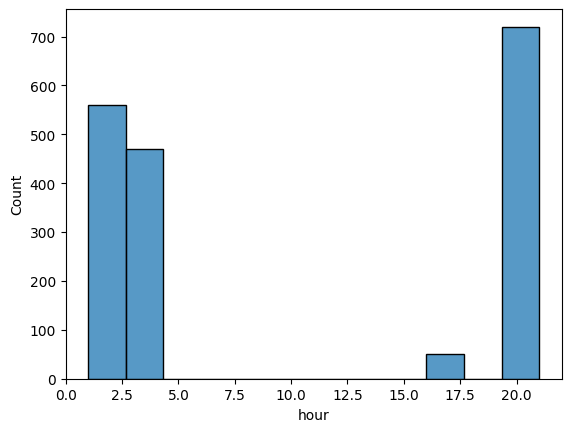

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


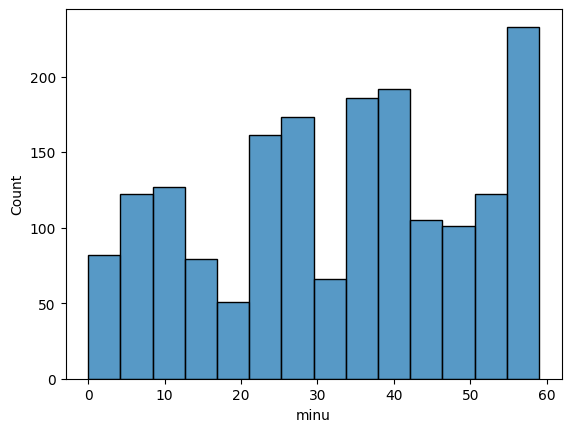

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


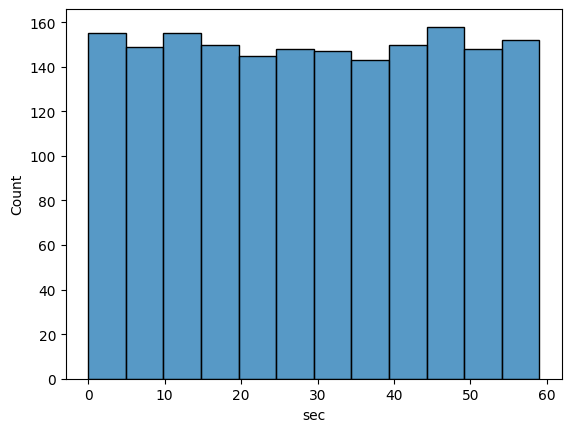

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


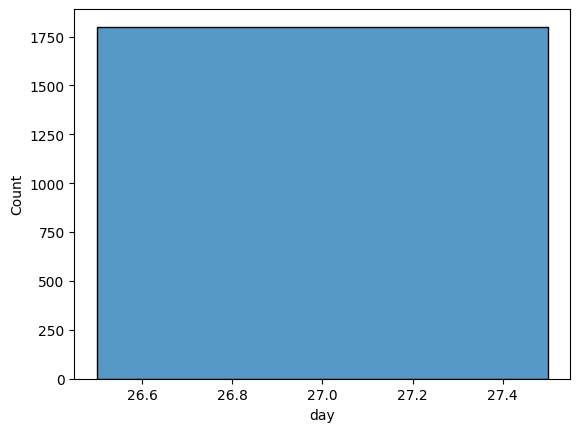

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


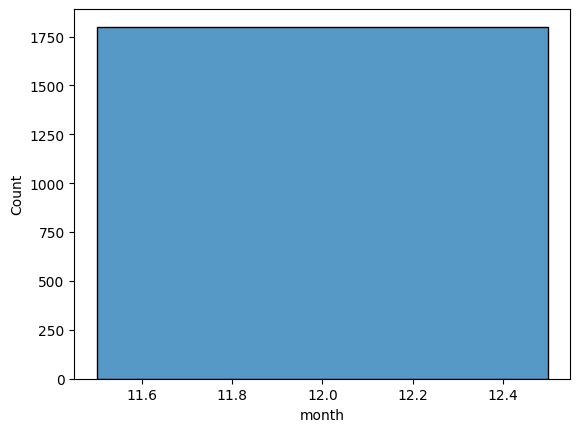

In [36]:
for col in df.columns:
    sns.histplot(df[col]) 
    plt.show()

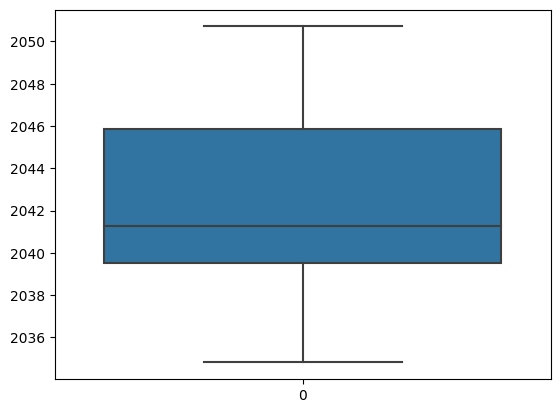

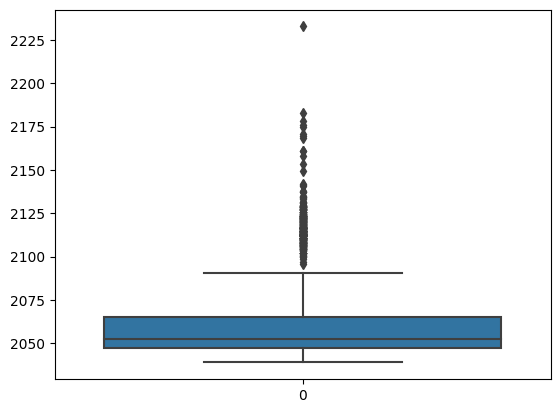

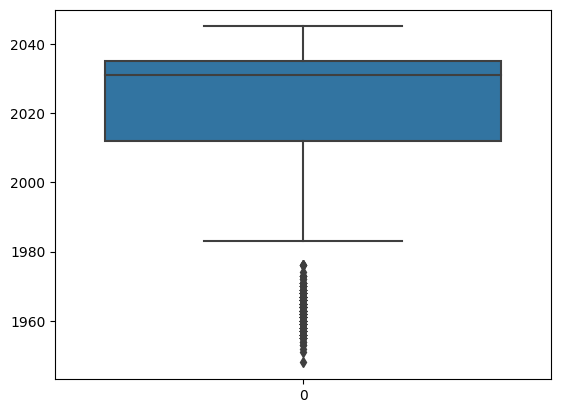

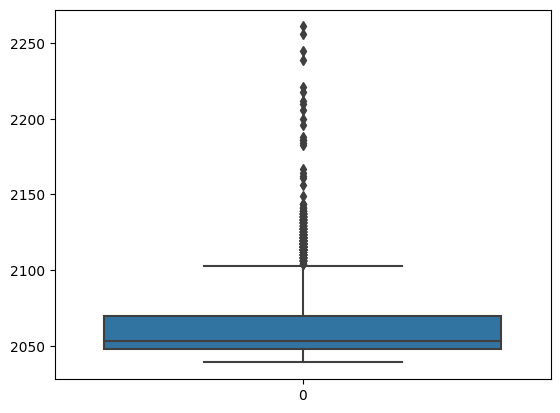

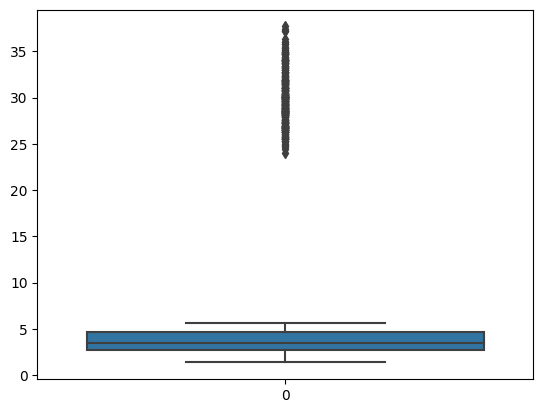

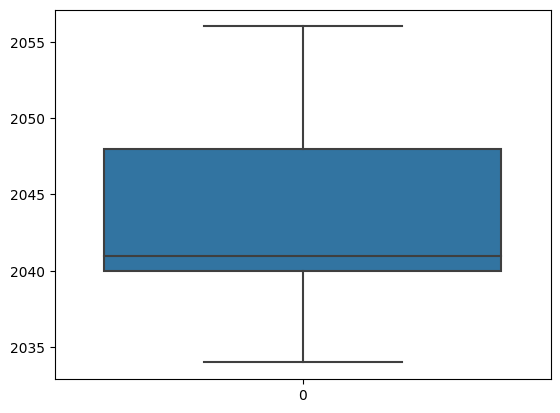

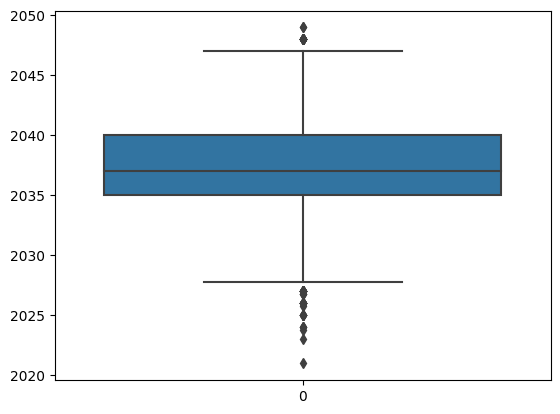

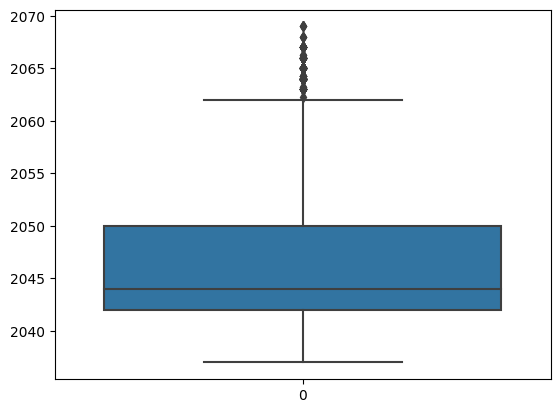

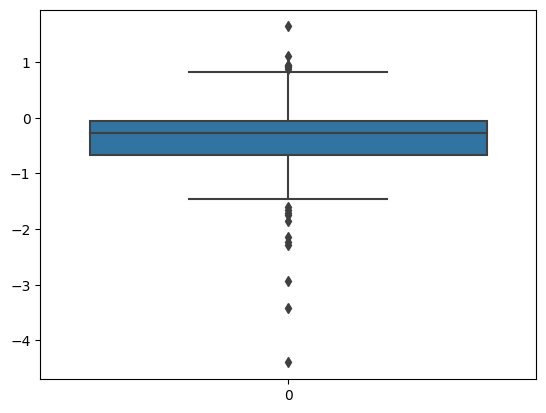

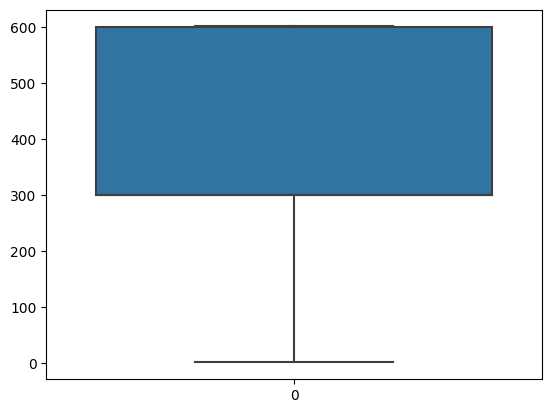

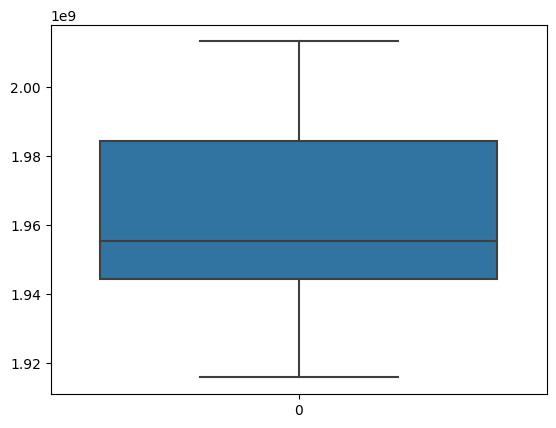

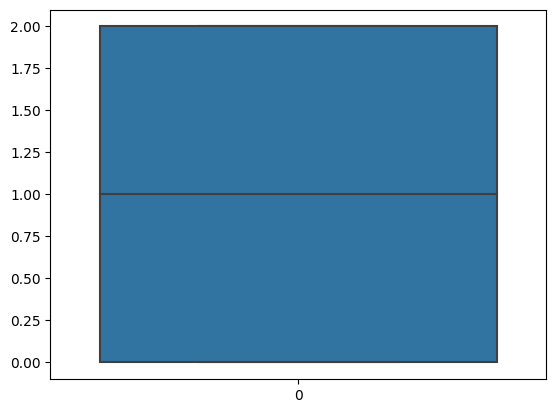

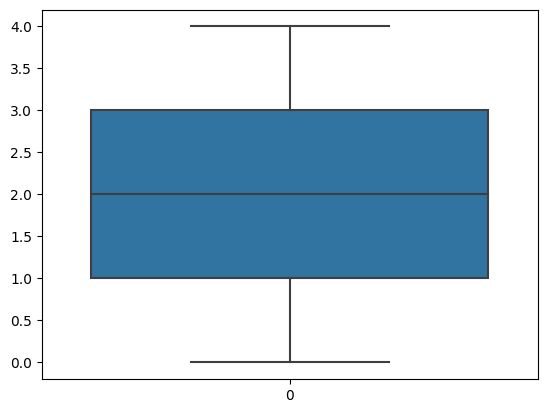

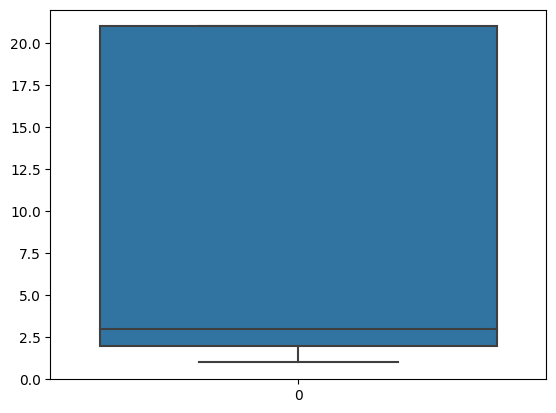

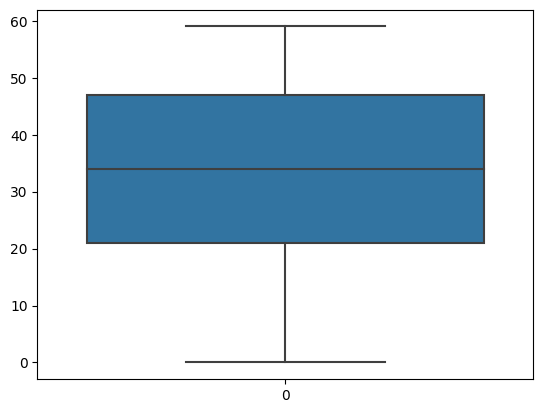

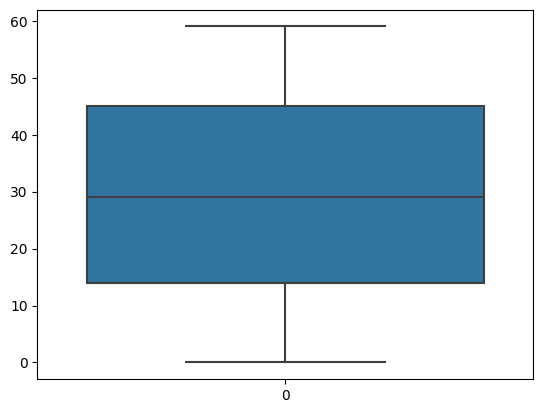

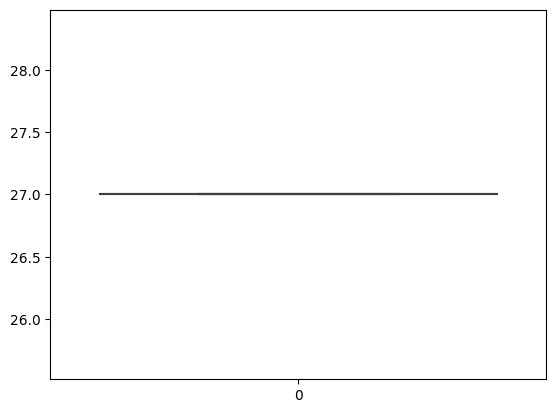

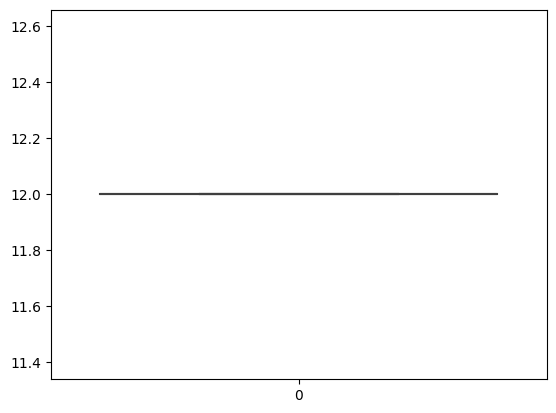

In [37]:
for col in df.columns:
    sns.boxplot(df[col]) 
    plt.show()

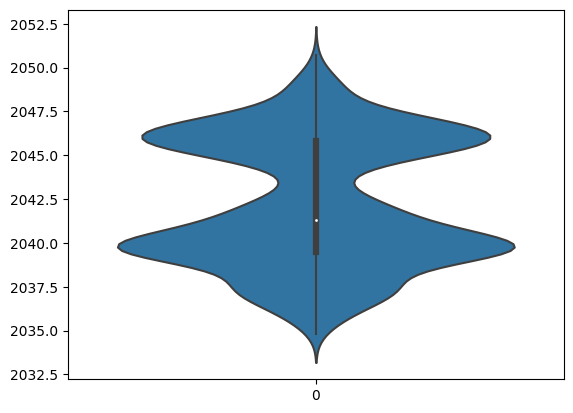

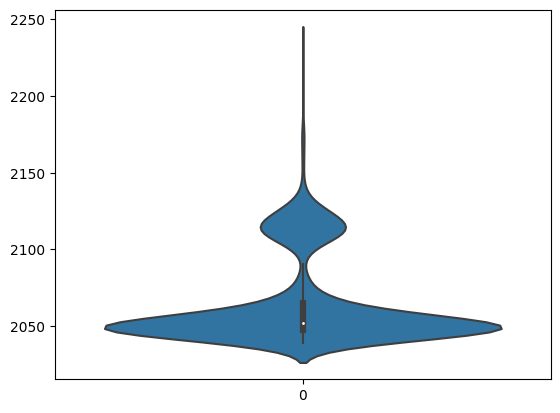

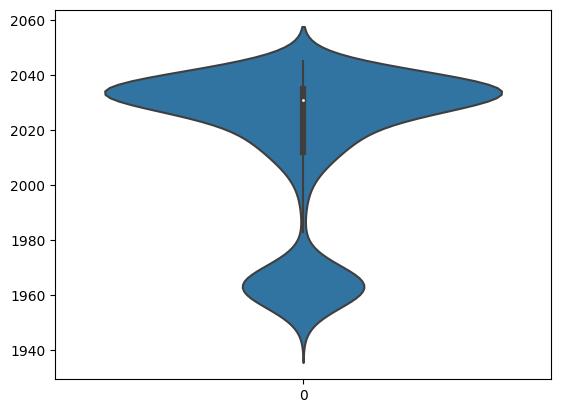

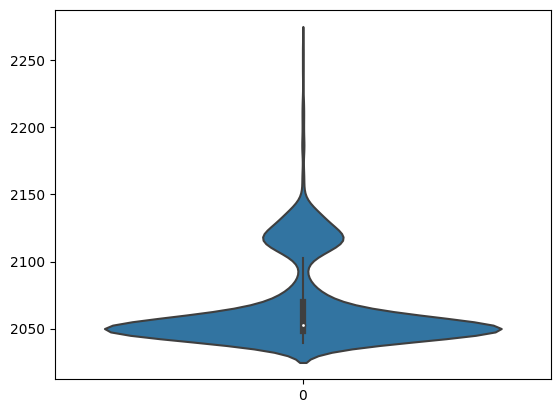

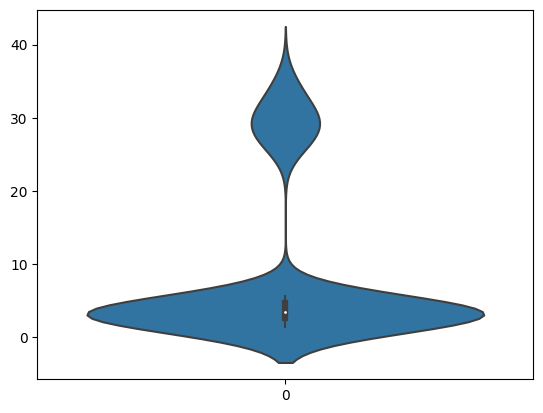

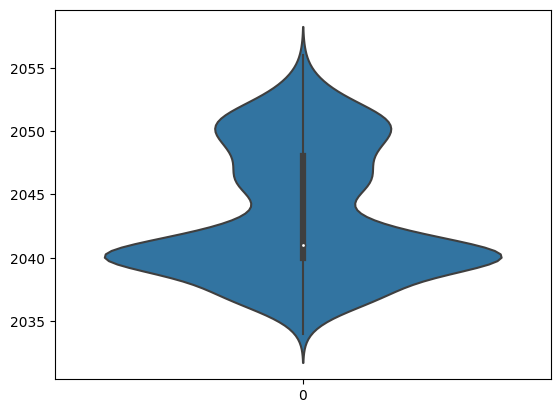

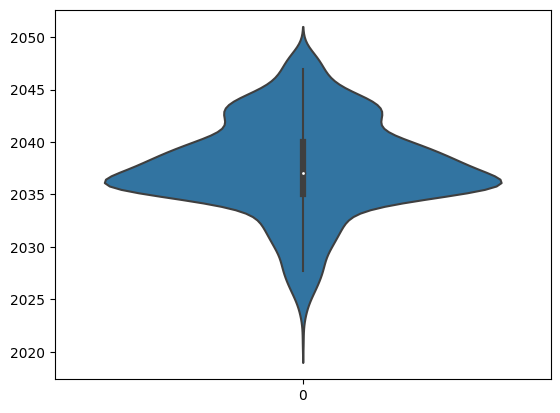

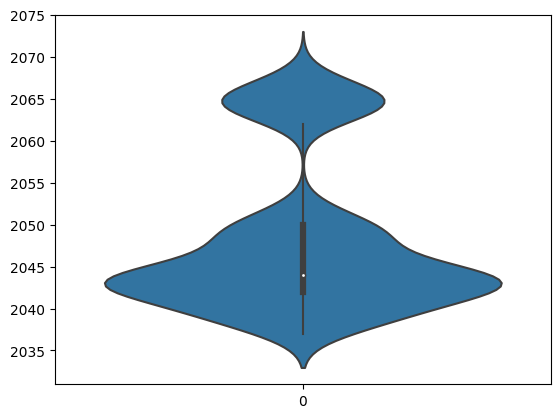

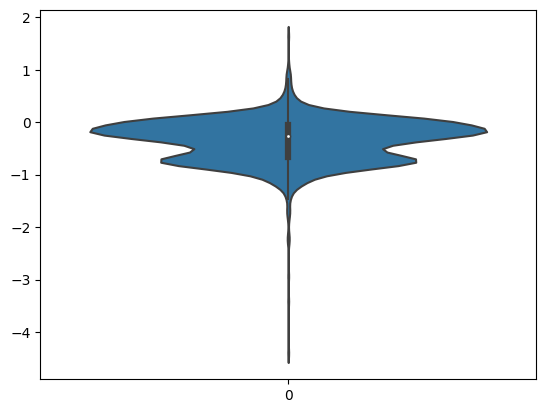

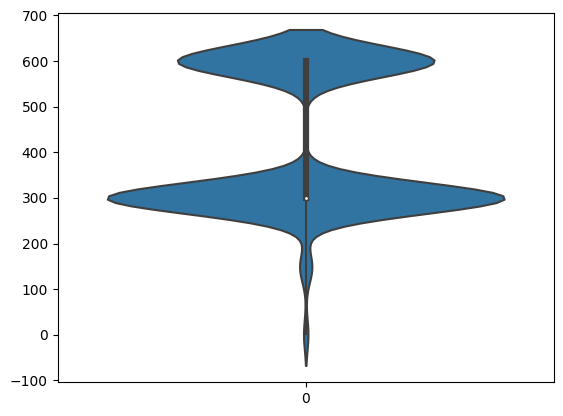

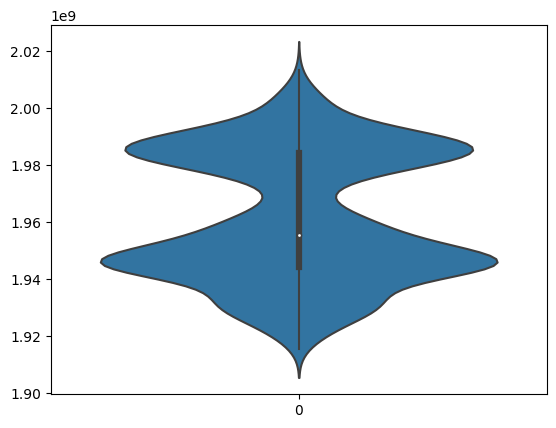

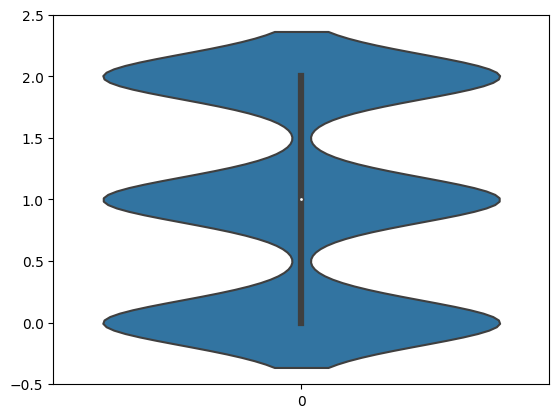

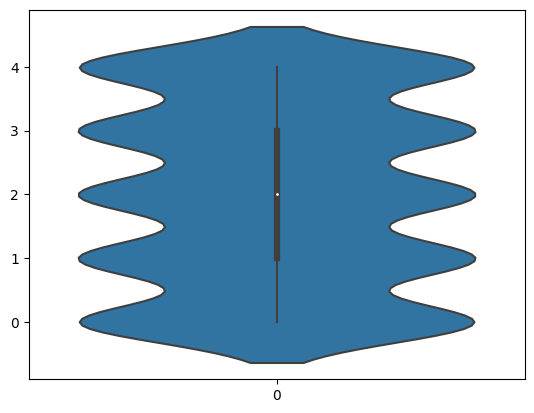

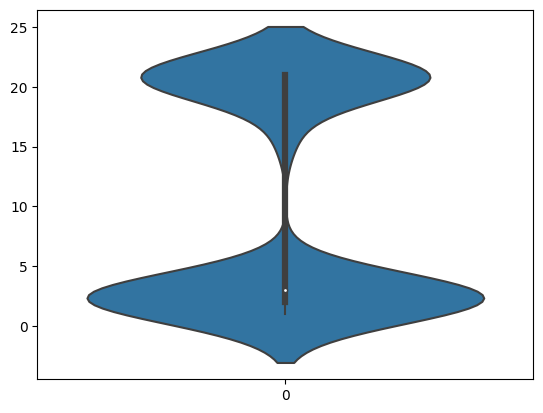

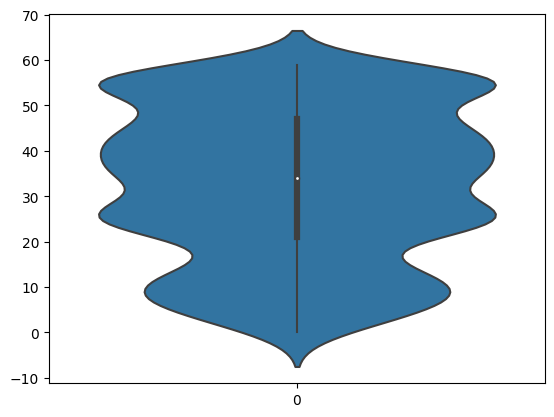

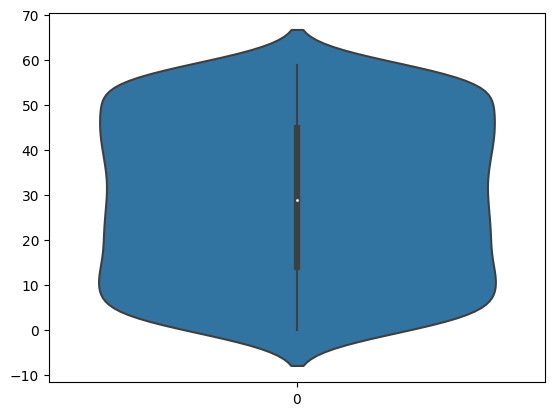

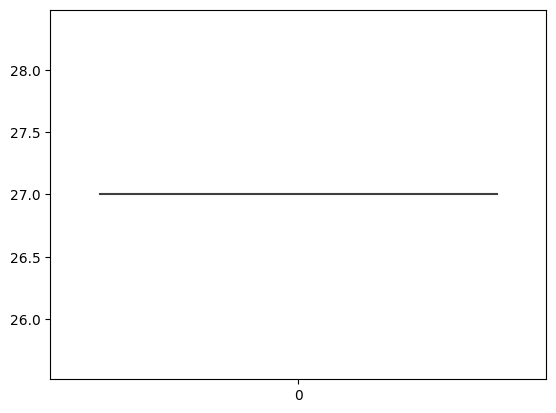

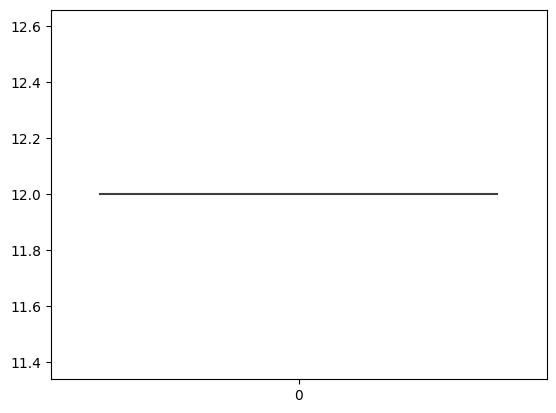

In [38]:
for col in df.columns:
    sns.violinplot(df[col]) 
    plt.show()

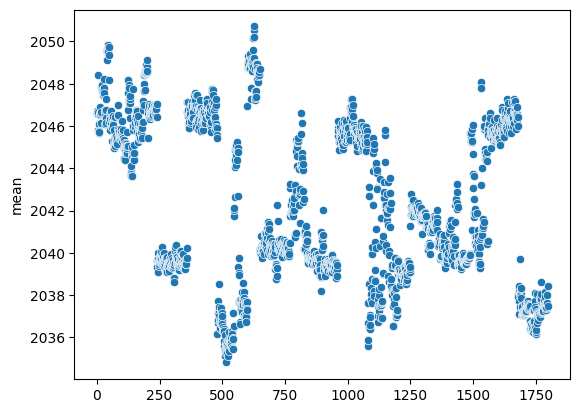

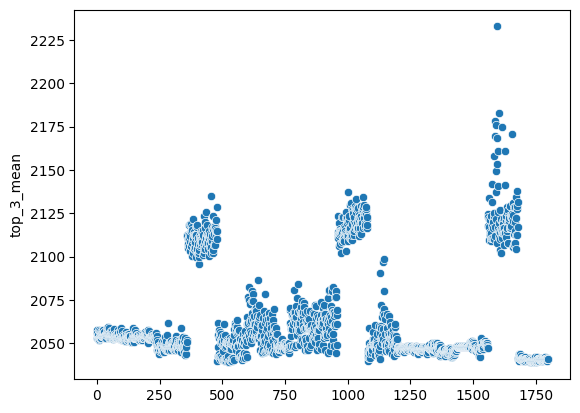

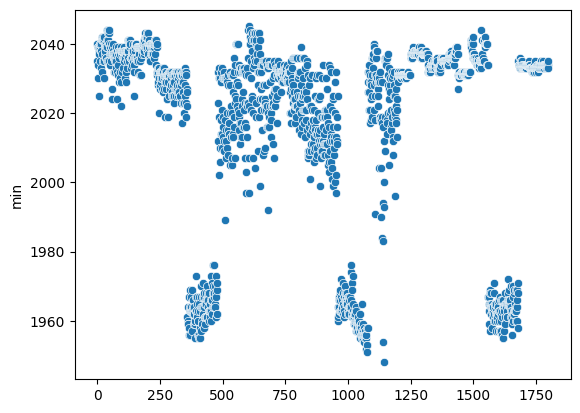

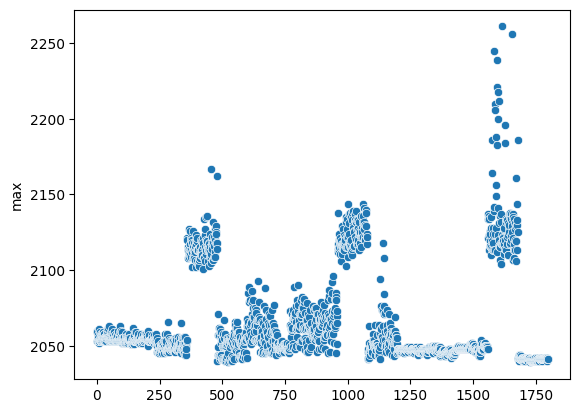

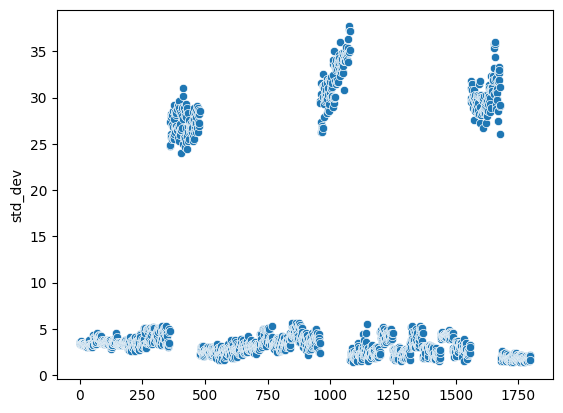

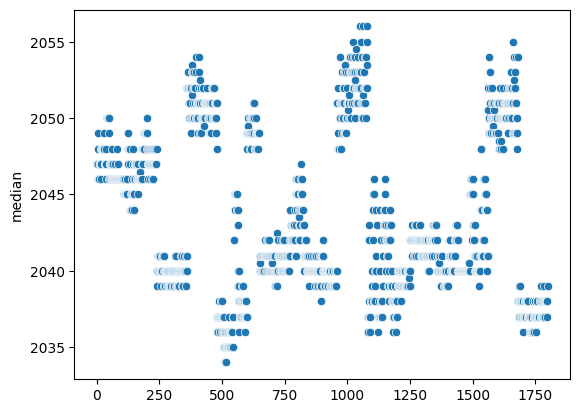

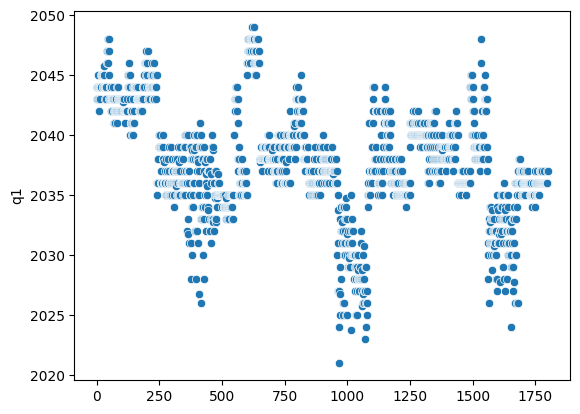

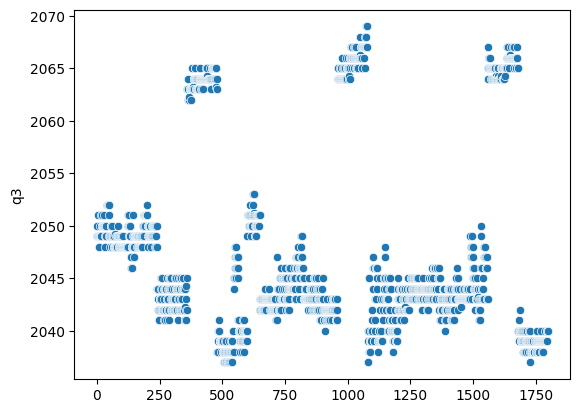

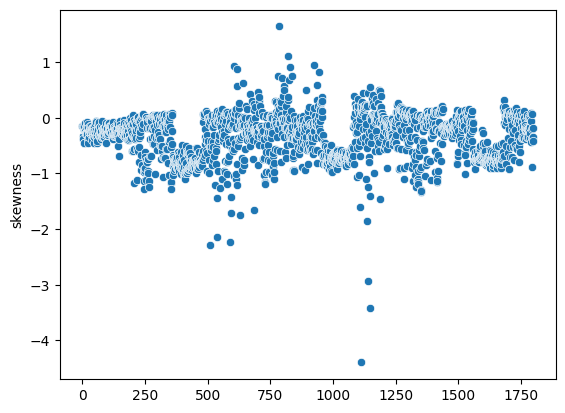

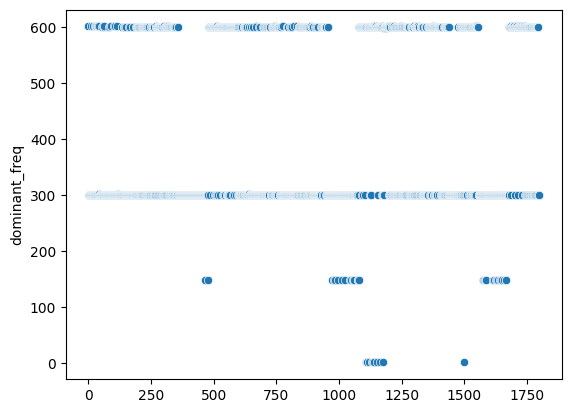

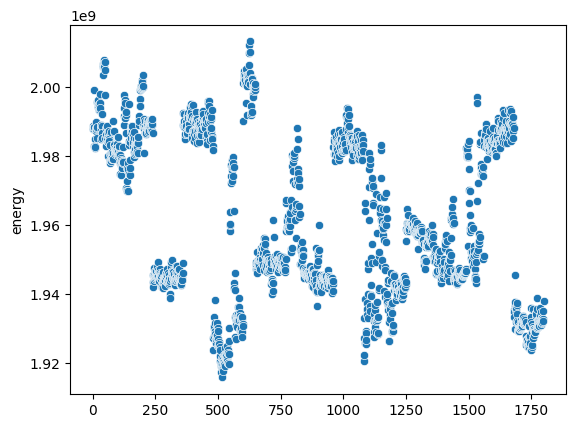

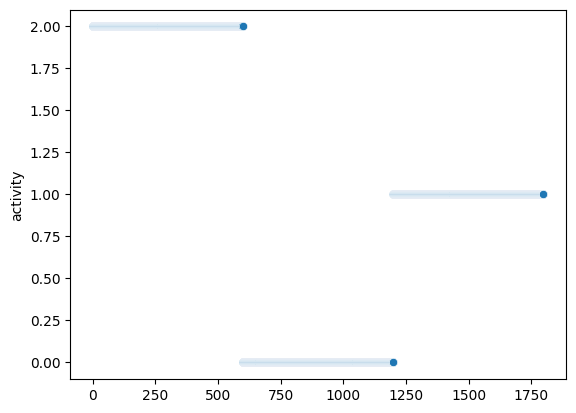

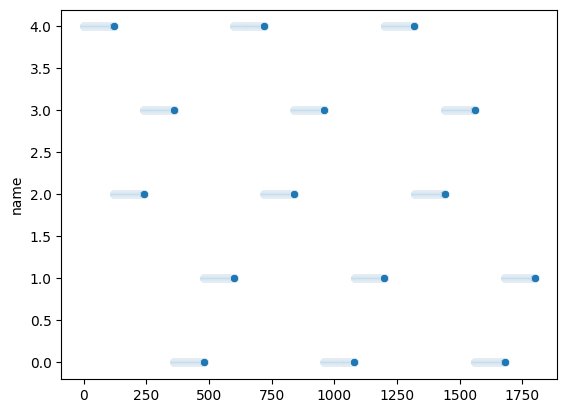

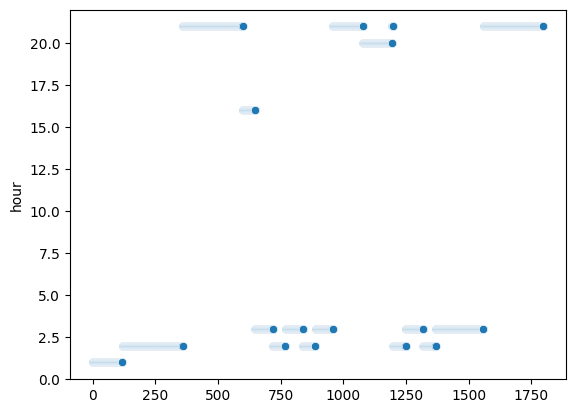

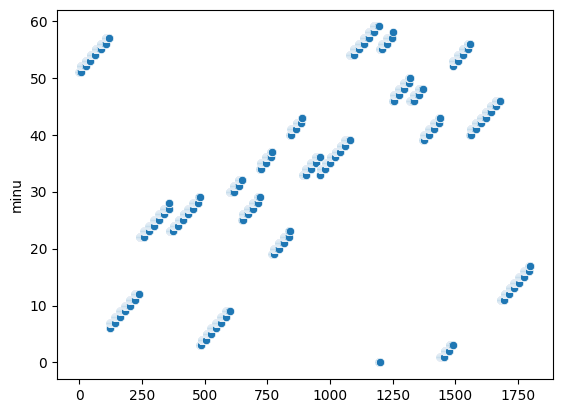

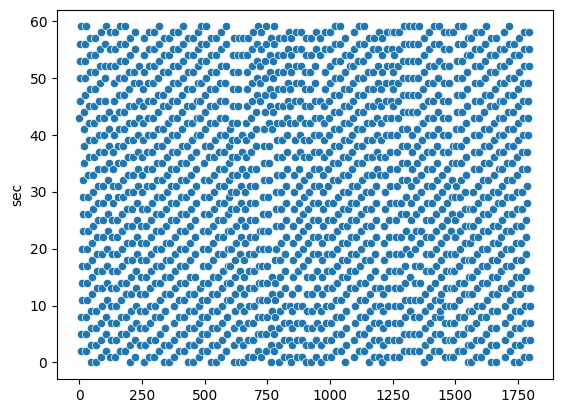

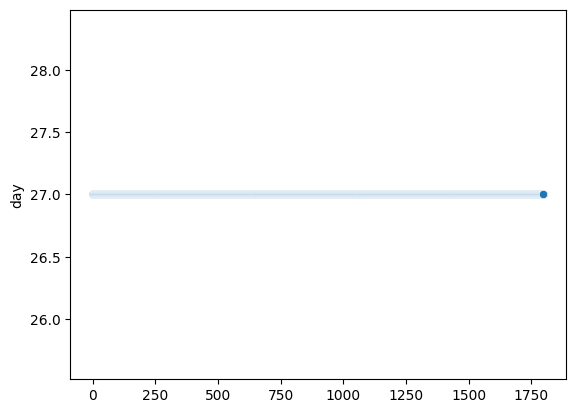

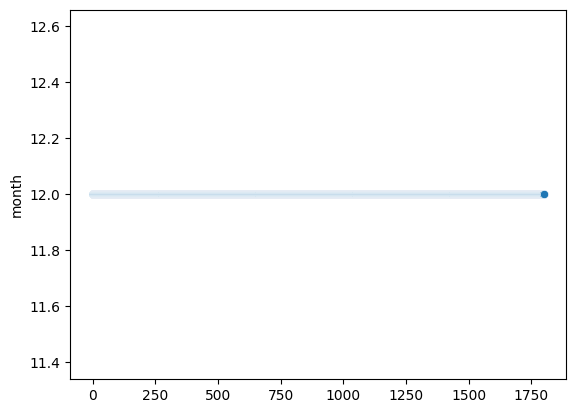

In [39]:
for col in df.columns:
    sns.scatterplot(df[col]) 
    plt.show()